### Indeed.ca Internship Location Data to Choropleth Map

#### Python Pandas, Matplotlib & Others

In [195]:
# Visualize job titles, company, location
# Summary NLP?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #includes seaborn and wordcloud
from PIL import Image #python imaging library
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv("sept_final_scrape.csv",usecols = ['job_title','company_name','location','summary','salary'])

In [65]:
df.head()

,job_title,company_name,location,summary,salary
0,"Summer Intern, Data Science & Engineering",HSBC Bank Canada,"Toronto, ON",This could be building and changing predictive...,Nothing_found
1,Student Intern,Skyworks,"Ottawa, ON",Has strong data analysis skill. Support PEs wi...,Nothing_found
2,Data Scientist Intern,Geotab,"Oakville, ON","As a Data Scientist Intern, you will work alon...",Nothing_found
3,"Data Engineer, Omnia AI - Co-op/Intern Winter ...",Deloitte,"Toronto, ON","Fascinated with data structures, data models a...",Nothing_found
4,Data Science Intern - Winter 2020 (Toronto),Intact,"Toronto, ON",We are currently looking for interns for our D...,Nothing_found


In [4]:
# basic tallies
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print("There are {} companies in this dataset such as {}... \n".format(len(df.company_name.unique()),", ".join(df.company_name.unique()[0:5])))
print("There are {} locations hiring interns {}... \n".format(len(df.location.unique()),", ".join(df.location.unique()[0:5])))
print("There are {} listings with salary info, while for most nothing is found, some sample salary listings are {}... \n".format(len(df.salary.unique())-1,", ".join(df.salary.unique()[1:5])))

There are 976 observations and 5 features in this dataset. 

There are 252 companies in this dataset such as HSBC Bank Canada, Skyworks, Geotab, Deloitte, Intact... 

There are 74 locations hiring interns Toronto, ON, Ottawa, ON, Oakville, ON, Oshawa, ON, Winnipeg, MB... 

There are 24 listings with salary info, while for most nothing is found, some sample salary listings are $40,000 a year, $39,027 a year, $18 an hour, $2,700 a month... 



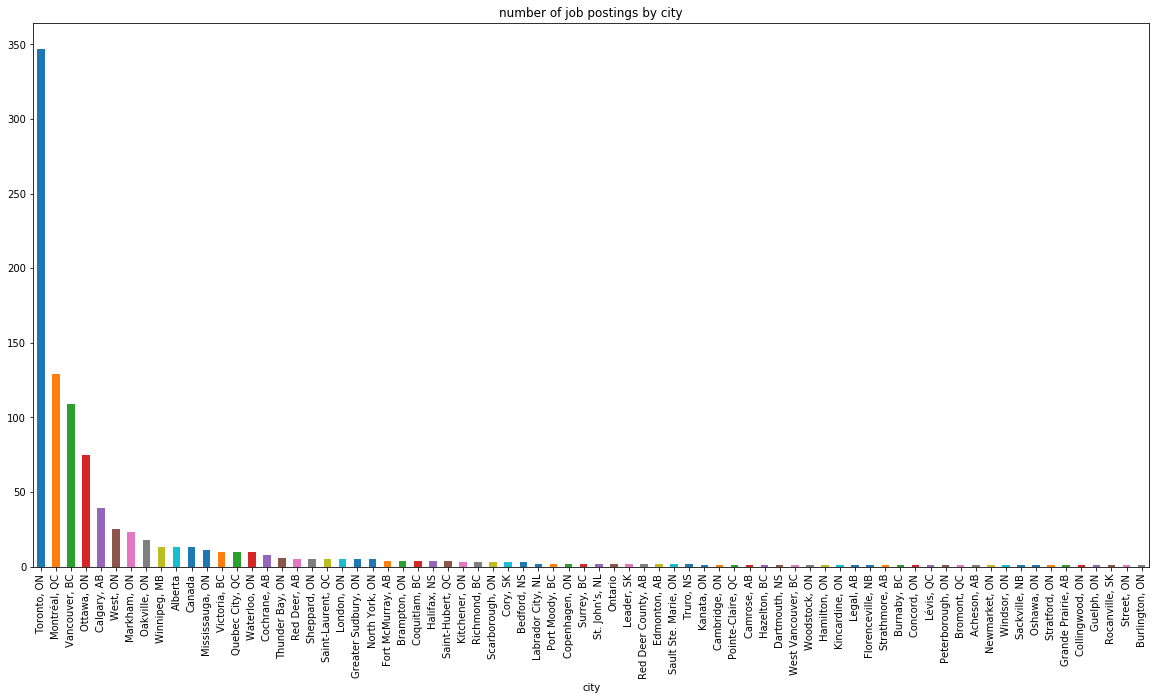

In [80]:
# interested in looking at location stats
# city count as bar graph
location = pd.value_counts(df['location'].values, sort=False)
location = location.to_frame(name="count")
location_city_index = location.rename_axis('location')
location['city'] = location.index
location = location.reset_index(drop=True)
location = location.sort_values(by=['count'], ascending=False)
location.plot.bar(x='city', y='count', rot=90, legend=False, figsize=(20,10), sort_columns=True, title="number of job postings by city")

In [226]:
# show top 5 job locations
location_city_index.nlargest(5,'count')

,count
location,
"Toronto, ON",347
"Montréal, QC",129
"Vancouver, BC",109
"Ottawa, ON",75
"Calgary, AB",39


In [5]:
import geopandas as gpd
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch

In [6]:
# choropleth map
# Medium blog of Benjamin Cooley
# https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
# canada province boundary map .shp data https://www.sciencebase.gov/catalog/item/5ab555c6e4b081f61ab78093

# set the filepath and load in a shapefile
fp = 'CanadianProvinc/gpr_000b11a_e/gpr_000b11a_e.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# province level map
map_df

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,(POLYGON ((-123.5397725159999 48.3173484960000...
1,24,Quebec / Québec,Quebec,Québec,Que.,Qc,(POLYGON ((-74.63814234299991 44.9998372320000...
2,62,Nunavut,Nunavut,Nunavut,Nvt.,Nt,(POLYGON ((-79.99351691899994 51.2772504150000...
3,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,(POLYGON ((-62.49301775499993 46.0251520690000...
4,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,POLYGON ((-102.0000000129999 59.99999999800008...
5,60,Yukon,Yukon,Yukon,Y.T.,Yn,(POLYGON ((-136.4722395469999 68.8938845840000...
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,(POLYGON ((-95.15588286899992 49.5915549880000...
7,35,Ontario,Ontario,Ontario,Ont.,Ont.,(POLYGON ((-82.6887101609999 41.68452518900006...
8,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,(POLYGON ((-66.76541058299995 44.5837696760000...
9,61,Northwest Territories / Territoires du Nord-Ouest,Northwest Territories,Territoires du Nord-Ouest,N.W.T.,T.N.-O.,(POLYGON ((-133.4394346699999 68.7867665800000...


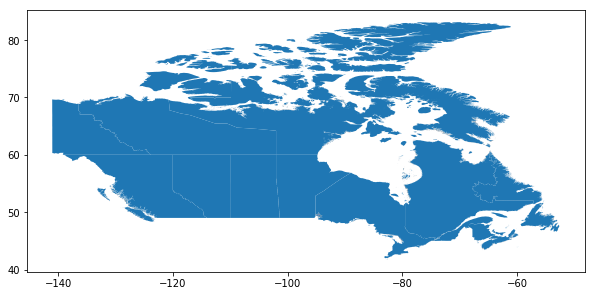

In [88]:
map_df.plot(figsize=(10,20)) # check boundaries map

In [7]:
cities_provinces = [df['location'][i].split(",") for i in range(0,len(df['location']))]
cities_provinces = [cities_provinces[i] for i in range(0,len(cities_provinces)) if cities_provinces[i][0] != 'Canada']

for i in range(0,len(cities_provinces)):
    if cities_provinces[i][0] == 'Ontario':
        cities_provinces[i][0] = "ON"
    elif cities_provinces[i][0] == 'Alberta':
        cities_provinces[i][0] = "AB"
        
        
prov = []
for i in range(0,len(cities_provinces)):
    try:
        prov.append(cities_provinces[i][1].strip()) # get province code
    except:
        prov.append(cities_provinces[i][0].strip()) # if only province

In [8]:
df_prov_temp = pd.DataFrame(prov, columns=["prov"])
prov_series = pd.value_counts(df_prov_temp['prov'].values, sort=False)
prov_series

NS     10
NL      4
QC    151
AB     78
NB      2
MB     13
BC    133
SK      6
ON    566
dtype: int64

In [40]:
prov_df = pd.Series.to_frame(prov_series)
prov_df.columns = ['count']
prov_df['prov'] = list(prov_df.index)

prov_df = prov_df.reset_index(drop=True)

In [41]:
full_prov_names = {'AB':'Alberta',
                   'BC':'British Columbia',
                   'MB':'Manitoba',
                   'NB':'New Brunswick',
                   'NL':'Newfoundland and Labrador',
                   'NS':'Nova Scotia',
                   'ON':'Ontario',
                   'PE':'Prince Edward Island',
                   'QC':'Quebec',
                   'SK':'Saskatchewan',
                   'NT':'Northwest Territories',
                   'NU':'Nunavut',
                   'YT':'Yukon',}

In [42]:
prov_df = prov_df.replace({'prov':full_prov_names}) # https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
prov_df

,count,prov
0,10,Nova Scotia
1,4,Newfoundland and Labrador
2,151,Quebec
3,78,Alberta
4,2,New Brunswick
5,13,Manitoba
6,133,British Columbia
7,6,Saskatchewan
8,566,Ontario


In [57]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('PRENAME').join(prov_df.set_index('prov'))
merged['count'].fillna(0, inplace=True)
merged.head()

,PRUID,PRNAME,PRFNAME,PREABBR,PRFABBR,geometry,count
PRENAME,,,,,,,
British Columbia,59,British Columbia / Colombie-Britannique,Colombie-Britannique,B.C.,C.-B.,(POLYGON ((-123.5397725159999 48.3173484960000...,133.0
Quebec,24,Quebec / Québec,Québec,Que.,Qc,(POLYGON ((-74.63814234299991 44.9998372320000...,151.0
Nunavut,62,Nunavut,Nunavut,Nvt.,Nt,(POLYGON ((-79.99351691899994 51.2772504150000...,0.0
Prince Edward Island,11,Prince Edward Island / Île-du-Prince-Édouard,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,(POLYGON ((-62.49301775499993 46.0251520690000...,0.0
Saskatchewan,47,Saskatchewan,Saskatchewan,Sask.,Sask.,POLYGON ((-102.0000000129999 59.99999999800008...,6.0


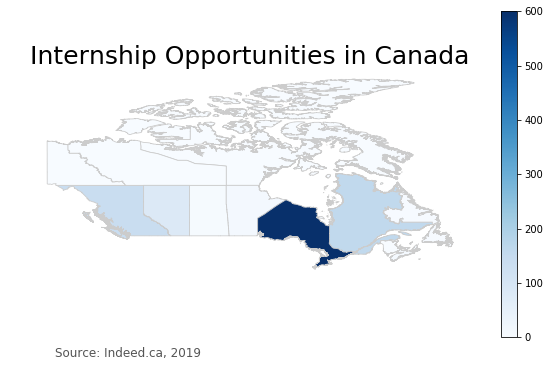

In [62]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'count'
# set the range for the choropleth
vmin, vmax = 0, 600
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='.8')
ax.axis('off')
# add a title
ax.set_title('Internship Opportunities in Canada', fontdict={'fontsize':'25', 'fontweight':'3'})
# create an annotation for the data source
ax.annotate('Source: Indeed.ca, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)